# Isolation Forest

In [25]:
from sklearn.ensemble import IsolationForest

In [26]:
classifier = IsolationForest(contamination=0.03, random_state=0)

In [27]:
classifier.fit(df);

In [28]:
predictions = classifier.predict(df)

In [29]:
row_inds = np.where(predictions == -1)[0]

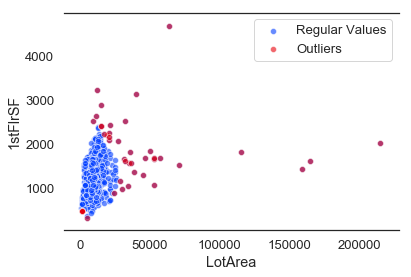

In [30]:
sns.scatterplot(x=df['LotArea'], 
                y=df['1stFlrSF'], 
                color='b', alpha=0.6, label='Regular Values');

sns.scatterplot(x=df.loc[row_inds, 'LotArea'], 
                y=df.loc[row_inds, '1stFlrSF'], 
                color='r', alpha=0.6, label='Outliers');

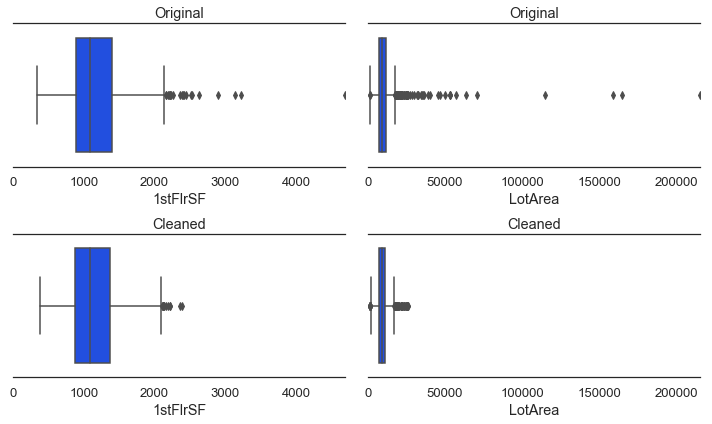

In [31]:
f, axes = plt.subplots(2, 2, figsize=(10, 6))

sns.boxplot(df['1stFlrSF'], ax=axes[0,0])
sns.boxplot(df['LotArea'], ax=axes[0,1])
sns.boxplot(df.drop(row_inds)['1stFlrSF'], ax=axes[1,0])
sns.boxplot(df.drop(row_inds)['LotArea'], ax=axes[1,1])

axes[0,0].set(xlim=(0, df['1stFlrSF'].max()), title='Original')
axes[0,1].set(xlim=(0, df['LotArea'].max()), title='Original')
axes[1,0].set(xlim=(0, df['1stFlrSF'].max()), title='Cleaned')
axes[1,1].set(xlim=(0, df['LotArea'].max()), title='Cleaned')

plt.tight_layout()